Método do Cotovelo é usado para encontrar o melhor número possível de clusters dado um critério chamado "inércia". A Inércia é a soma dos quadrados das distâncias dos pontos aos centróides de seus respectivos clusters. 
Um gráfico é criado onde o eixo X representa o número de clusters e o eixo Y representa a inércia.
Visualmente, é buscado o ponto de maior custo-benefício com relação a diminuição da inércia para aumento da quantidade de clusters.
Em resumo, o ponto K de inflexão onde tivemos a maior queda possível de inércia e que não será próximo da mesma taxa nos próximos números de K clusters.

Chamado "elbow method" no inglês.
É uma técnica heurística útil para determinar o melhor número de clusters.

---

In [2]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.spatial.distance import cdist
from sklearn import metrics
from sklearn.cluster import KMeans

In [3]:
x1 = np.random.randint(0, 10 ,21)
x2 = np.random.randint(0, 10 ,21)
X = np.array(list(zip(x1, x2))).reshape(len(x1), 2)

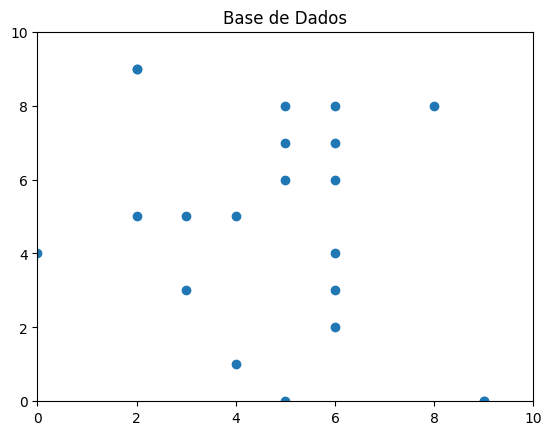

In [4]:
plt.plot()
plt.xlim([0, 10])
plt.ylim([0, 10])
plt.title('Base de Dados')
plt.scatter(x1, x2)
plt.show()

# Treinando Modelo para N-max = 10 clusters

In [5]:
inertias = []
mapping1 = {}
mapping2 = {}
K = range(1, 10)

In [6]:
for k in K:
    kmeanModel = KMeans(n_clusters=k).fit(X)
    kmeanModel.fit(X)
    inertias.append(kmeanModel.inertia_)
    mapping1[k] = sum(np.min(cdist(X,
                                   kmeanModel.cluster_centers_,
                                   'euclidean'),axis=1)) / X.shape[0]
    mapping2[k] = kmeanModel.inertia_

In [7]:
inertias[:K[-1]]

[286.3809523809524,
 142.33653846153845,
 92.0,
 65.82222222222222,
 37.31428571428572,
 27.114285714285714,
 20.9,
 16.714285714285715,
 10.666666666666668]

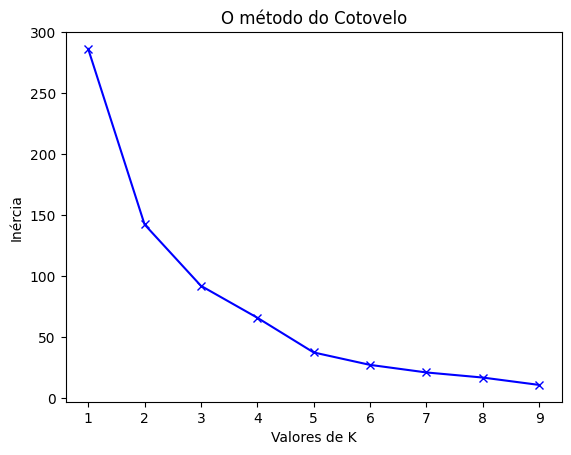

In [8]:
plt.plot(K, inertias[:K[-1]], 'bx-')
plt.xlabel('Valores de K')
plt.ylabel('Inércia')
plt.title('O método do Cotovelo')
plt.show()